# Experimentación

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import main
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
cake_size = 100
num_iters = 1000
debug = False

In [58]:
vals = main.flavor_valuation_identity()

infos = [main.P1_INFO_INCOMPLETE, main.P1_INFO_COMPLETE]

valuations = [
    main.flavor_valuation_identity(),
    main.flavor_valuation_inverse(),
    main.flavor_valuation_inverse_2(),
    main.flavor_valuation_todo_picky(),
]

all_pairs = []
for info in infos:
    for val in valuations:
        all_pairs.append((info, val))

In [59]:
records = []
for info, val in tqdm(all_pairs):
    game = main.CutAndChoose(debug=debug, vals=val, quiet=True, p1_info=info)
    r = game.play(cake_size, num_iters)
    records.extend(r)

df = pd.DataFrame()
df = df.from_records(records)
print("Finished!")

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:16<00:00,  2.06s/it]

Finished!


In [60]:
df.to_csv("results.csv")

In [61]:
#df = pd.read_csv("results.csv")

In [77]:
df_complete = df[(df["p1_info"] ==main.P1_INFO_COMPLETE)]

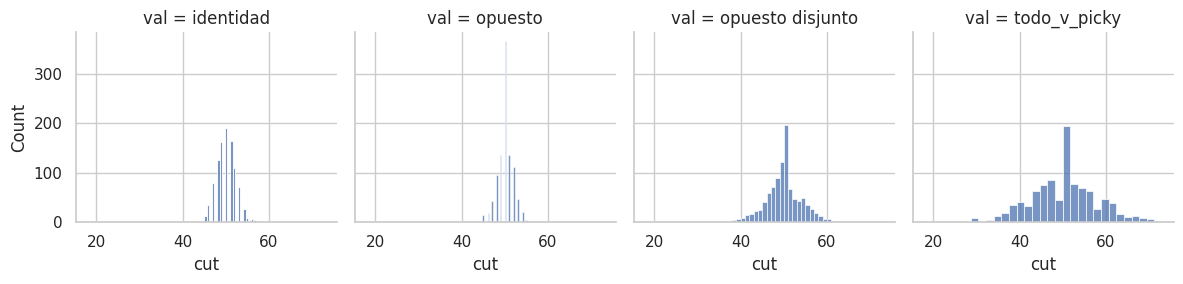

In [82]:
g = sns.FacetGrid(df_complete, col="val")
g.map(sns.histplot, "cut")
# sns.histplot(data=df_complete, x="cut", hue="val")

<AxesSubplot:xlabel='cut', ylabel='Count'>

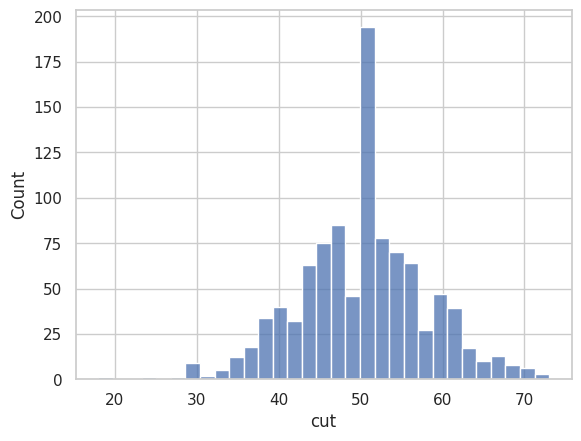

In [85]:
sns.histplot(data=df_complete[df_complete["val"]=="todo_v_picky"], x="cut")

<AxesSubplot:>

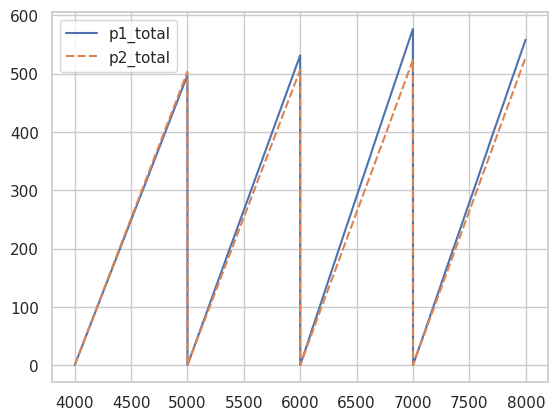

In [86]:
sns.lineplot(data=df_complete[["p1_total", "p2_total"]])

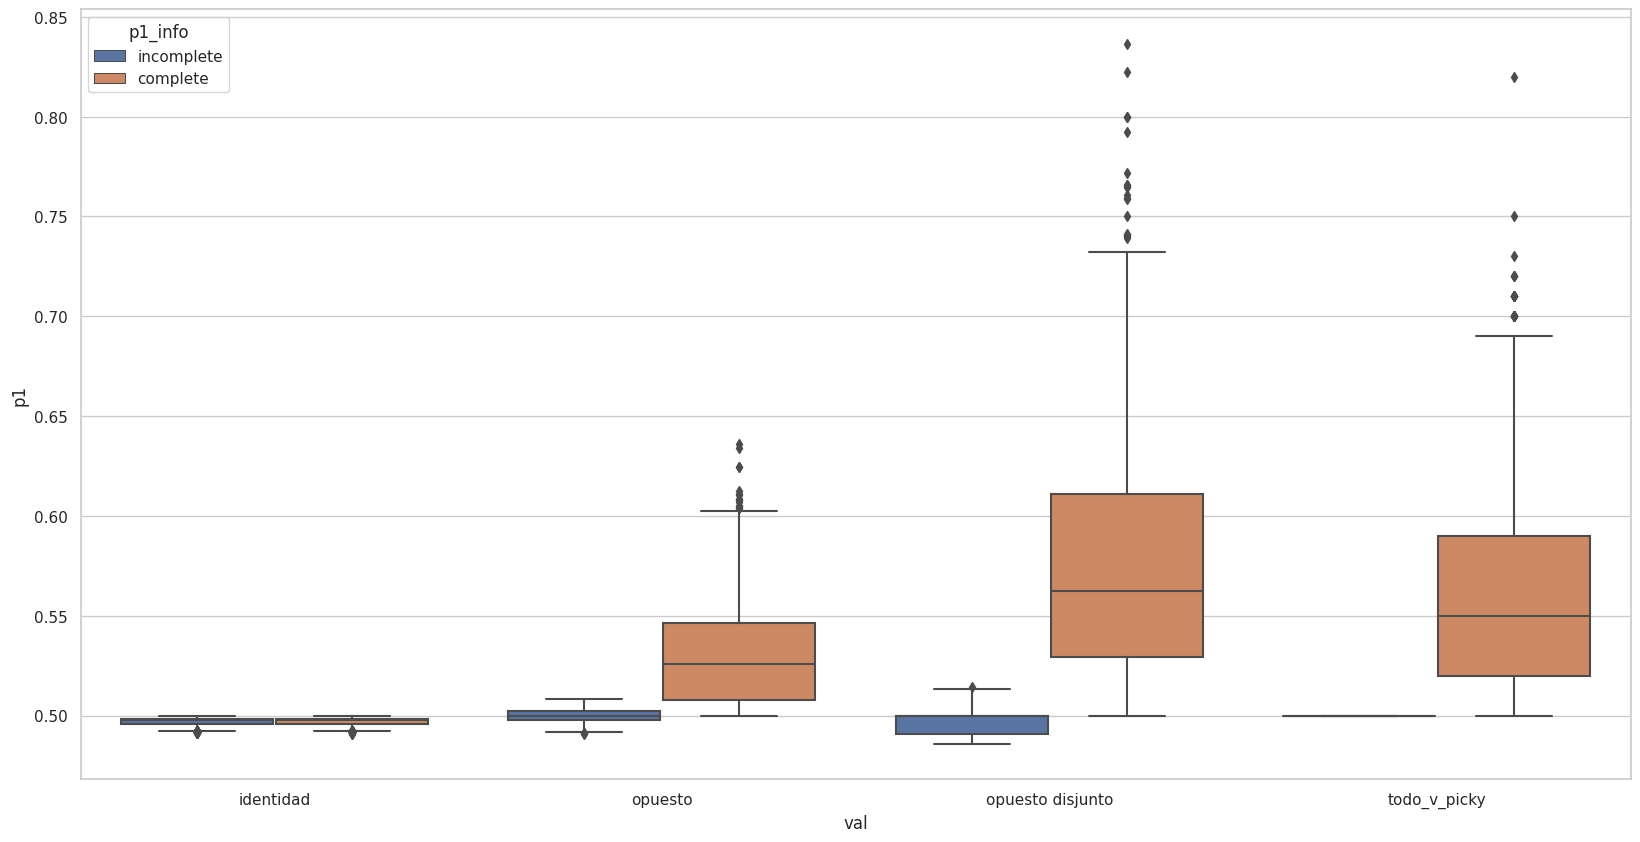

In [68]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(data=df, x="val", y="p1", hue="p1_info")
#ax.set(ylim=(0, 1))
# TODO: Cambiar nombres a los ejes